# Downloading and cleaning demand data

### First I will get the data from National Grid ESO and I downloaded it from here <a href = "https://demandforecast.nationalgrid.com/efs_demand_forecast/faces/DataExplorer"> here </a>  It has data from 2005 to 2020. 

In [5]:
%pwd

'/home/sebair/CEU-Capstone-Project/Jupyter_Notebooks'

The data is in CSV files and the folder named demand_data looks like below. Also it contains one doc document about the descriptions of the fields.

In [9]:
%ls ../demand_data 

 DemandData_2005_1542016460040.csv   DemandData_2015_1542016605715.csv
 DemandData_2006_1542016477936.csv   Demand_Data2016_1542016628412.csv
 DemandData_2007_1542016490891.csv   DemandData_2017_1551263464434.csv
 DemandData_2008_1542016504804.csv   DemandData_2018_1551263484189.csv
 DemandData_2009_1542016517401.csv   DemandData_2019_1581934964092.csv
 DemandData_2010_1542016528958.csv   DemandData_2020_1584352637369.csv
 DemandData_2011_1542016545896.csv  'DemandData Field Descriptions.doc'
 DemandData_2012_1542016557812.csv   NG_demand_1DA_20200425_1587715204216.csv
 DemandData_2013_1542016569881.csv   NG_demand_7DA_20200422_1586963701809.csv
 DemandData_2014_1542016583597.csv


For example, this is how they look like in an editor.
<img src = "../pics/demand_data_example.png">

In [24]:
import os
import pandas as pd
files = os.listdir("../demand_data")
files

['DemandData_2015_1542016605715.csv',
 'DemandData_2011_1542016545896.csv',
 'DemandData_2005_1542016460040.csv',
 'DemandData_2007_1542016490891.csv',
 'DemandData_2019_1581934964092.csv',
 'DemandData Field Descriptions.doc',
 'DemandData_2012_1542016557812.csv',
 'DemandData_2018_1551263484189.csv',
 'DemandData_2020_1584352637369.csv',
 'DemandData_2013_1542016569881.csv',
 'DemandData_2010_1542016528958.csv',
 'DemandData_2009_1542016517401.csv',
 'DemandData_2006_1542016477936.csv',
 'DemandData_2014_1542016583597.csv',
 'DemandData_2008_1542016504804.csv',
 'DemandData_2017_1551263464434.csv',
 'DemandData_2016_1542016628412.csv']

In [94]:
import re
path = "../demand_data/"
temp_dict = {}
for file in files:
    try:
        year = file.split("_")[1]
        print("Creating dataframe for ",year,"demand data")
        df = pd.read_csv(path+file)
        temp_dict[year] = df
        print("The shape for ",year,"is",df.shape)
    except Exception as e:
        pass
    #df = pd.read_csv(file)
    #temp

Creating dataframe for  2015 demand data
The shape for  2015 is (17520, 23)
Creating dataframe for  2011 demand data
The shape for  2011 is (17520, 23)
Creating dataframe for  2005 demand data
The shape for  2005 is (13202, 23)
Creating dataframe for  2007 demand data
The shape for  2007 is (17520, 23)
Creating dataframe for  2019 demand data
The shape for  2019 is (17520, 23)
Creating dataframe for  2012 demand data
The shape for  2012 is (17568, 23)
Creating dataframe for  2018 demand data
The shape for  2018 is (17520, 22)
Creating dataframe for  2020 demand data
The shape for  2020 is (2640, 23)
Creating dataframe for  2013 demand data
The shape for  2013 is (17520, 23)
Creating dataframe for  2010 demand data
The shape for  2010 is (35040, 23)
Creating dataframe for  2009 demand data
The shape for  2009 is (17520, 23)
Creating dataframe for  2006 demand data
The shape for  2006 is (17520, 23)
Creating dataframe for  2014 demand data
The shape for  2014 is (17520, 23)
Creating data

In [90]:
temp_dict["2010"]

,SETTLEMENT_PERIOD,ND,I014_ND,TSD,I014_TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,...,I014_PUMP_STORAGE_PUMPING,FRENCH_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,I014_FRENCH_FLOW,I014_BRITNED_FLOW,I014_MOYLE_FLOW,I014_EAST_WEST_FLOW,I014_TSD.1
SETTLEMENT_DATE,,,,,,,,,,,,,,,,,,,,,
01-Jan-2009,1,37910,37686,38704,38850,33939,54,1403,0,0,...,404,2002,0,-161,0,1977,0,-161,0,38850
01-Jan-2009,2,38047,37804,38964,39090,34072,53,1403,0,0,...,527,2002,0,-160,0,1977,0,-160,0,39090
01-Jan-2009,3,37380,37326,38651,39104,33615,53,1403,0,0,...,1018,2002,0,-160,0,1977,0,-160,0,39104
01-Jan-2009,4,36426,36202,37775,38208,32526,50,1403,0,0,...,1269,1772,0,-160,0,1746,0,-160,0,38208
01-Jan-2009,5,35687,35529,37298,37802,31877,50,1403,0,0,...,1566,1753,0,-160,0,1730,0,-160,0,37802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-Dec-2010,44,35215,35224,36272,36288,31765,390,2141,0,45,...,16,1897,0,-450,0,1881,0,-450,0,36288
31-Dec-2010,45,34181,34184,35238,35248,30811,390,2141,0,45,...,16,1539,0,-450,0,1524,0,-450,0,35248
31-Dec-2010,46,33822,33828,34871,34883,30399,449,2141,0,45,...,15,1536,0,-442,0,1526,0,-442,0,34883


### There is no consistency in the data. The 2010 dataframe has 35040 rows for some reason and the others around 17 520 rows.

In [48]:
temp_dict["2010"].SETTLEMENT_DATE = pd.to_datetime(temp_dict["2010"].SETTLEMENT_DATE)

In [54]:
 temp_dict["2010"][temp_dict["2010"]['SETTLEMENT_DATE'].dt.year == 2009]

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,I014_ND,TSD,I014_TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,...,I014_PUMP_STORAGE_PUMPING,FRENCH_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,I014_FRENCH_FLOW,I014_BRITNED_FLOW,I014_MOYLE_FLOW,I014_EAST_WEST_FLOW,I014_TSD.1
0,2009-01-01,1,37910,37686,38704,38850,33939,54,1403,0,...,404,2002,0,-161,0,1977,0,-161,0,38850
1,2009-01-01,2,38047,37804,38964,39090,34072,53,1403,0,...,527,2002,0,-160,0,1977,0,-160,0,39090
2,2009-01-01,3,37380,37326,38651,39104,33615,53,1403,0,...,1018,2002,0,-160,0,1977,0,-160,0,39104
3,2009-01-01,4,36426,36202,37775,38208,32526,50,1403,0,...,1269,1772,0,-160,0,1746,0,-160,0,38208
4,2009-01-01,5,35687,35529,37298,37802,31877,50,1403,0,...,1566,1753,0,-160,0,1730,0,-160,0,37802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2009-12-31,44,36645,36738,37556,37653,32468,1019,1773,0,...,13,1589,0,-304,0,1574,0,-304,0,37653
17516,2009-12-31,45,35572,35703,36392,36526,31489,1019,1773,0,...,10,1589,0,-213,0,1573,0,-213,0,36526
17517,2009-12-31,46,35398,35499,36181,36286,31260,951,1773,0,...,17,1585,0,-170,0,1572,0,-170,0,36286
17518,2009-12-31,47,35005,35090,36062,36275,30855,951,1773,0,...,416,1994,0,-169,0,1978,0,-169,0,36275


### So I think that there was a mistake with 2009 and 2010. In the 2010 dataframe, there is the 2009 data. Therefore I will drop this data

In [59]:
#taking only year 2010
temp_dict['2010'] = temp_dict["2010"][temp_dict["2010"]['SETTLEMENT_DATE'].dt.year == 2010]
temp_dict["2010"]

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,I014_ND,TSD,I014_TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,...,I014_PUMP_STORAGE_PUMPING,FRENCH_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,I014_FRENCH_FLOW,I014_BRITNED_FLOW,I014_MOYLE_FLOW,I014_EAST_WEST_FLOW,I014_TSD.1
17520,2010-01-01,1,36453,36528,37593,37791,32391,906,1786,0,...,435,1977,0,-234,0,1963,0,-234,0,37791
17521,2010-01-01,2,36680,36756,37739,38006,32590,926,1786,0,...,348,2000,0,-236,0,1974,0,-236,0,38006
17522,2010-01-01,3,36343,36428,37467,37686,32291,926,1786,0,...,424,2000,0,-236,0,1983,0,-236,0,37686
17523,2010-01-01,4,35362,35432,36489,36841,31366,952,1786,0,...,575,2000,0,-236,0,1983,0,-236,0,36841
17524,2010-01-01,5,34366,34488,35563,35966,30522,952,1786,0,...,643,1999,0,-236,0,1983,0,-236,0,35966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2010-12-31,44,35215,35224,36272,36288,31765,390,2141,0,...,16,1897,0,-450,0,1881,0,-450,0,36288
35036,2010-12-31,45,34181,34184,35238,35248,30811,390,2141,0,...,16,1539,0,-450,0,1524,0,-450,0,35248
35037,2010-12-31,46,33822,33828,34871,34883,30399,449,2141,0,...,15,1536,0,-442,0,1526,0,-442,0,34883
35038,2010-12-31,47,33410,33482,34403,34480,29831,449,2141,0,...,18,1960,0,-381,0,1944,0,-381,0,34480


In [91]:
#double checking the shape
for i,j in temp_dict.items():
    print("Year",i,"has shape",j.shape)
    print("_____________________________")

Year 2015 has shape (17520, 22)
_____________________________
Year 2011 has shape (17520, 22)
_____________________________
Year 2005 has shape (13202, 22)
_____________________________
Year 2007 has shape (17520, 22)
_____________________________
Year 2019 has shape (17520, 22)
_____________________________
Year 2012 has shape (17568, 22)
_____________________________
Year 2018 has shape (17520, 21)
_____________________________
Year 2020 has shape (2640, 22)
_____________________________
Year 2013 has shape (17520, 22)
_____________________________
Year 2010 has shape (35040, 22)
_____________________________
Year 2009 has shape (17520, 22)
_____________________________
Year 2006 has shape (17520, 22)
_____________________________
Year 2014 has shape (17520, 22)
_____________________________
Year 2008 has shape (17568, 22)
_____________________________
Year 2017 has shape (17520, 21)
_____________________________
Year 2016 has shape (17568, 21)
_____________________________


### The next strange thing about this data is that 2005 dataframe has 13202 and 2020 has 2640 rows. I understand about 2020, but I think it would be the best to drop 2005 from the analysis.

In [64]:
#converting the Settlement date column to datetime and joining them
temp_dict["2010"].SETTLEMENT_DATE = pd.to_datetime(temp_dict["2010"].SETTLEMENT_DATE)

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,I014_ND,TSD,I014_TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,...,PUMP_STORAGE_PUMPING,I014_PUMP_STORAGE_PUMPING,FRENCH_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,I014_FRENCH_FLOW,I014_BRITNED_FLOW,I014_MOYLE_FLOW,I014_EAST_WEST_FLOW
0,01-Jan-2016,1,27700,27664,28414,28299,25315,1294,4013,0,...,114,106,1756,870,31,105,1740,872,25,103
1,01-Jan-2016,2,28379,28278,29007,28904,26025,1230,4013,0,...,28,26,1755,881,19,27,1740,883,25,26
2,01-Jan-2016,3,28155,27986,29063,29097,25804,1148,4013,0,...,308,323,1755,871,76,36,1740,875,76,36
3,01-Jan-2016,4,27147,26961,28326,28149,24867,1065,4013,0,...,572,572,1756,887,-7,65,1740,888,-14,65
4,01-Jan-2016,5,26154,26006,27348,27283,23993,1004,4013,0,...,493,493,1756,880,-101,20,1740,883,-100,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,31-Dec-2016,44,29837,29387,31233,30777,27097,1562,4871,0,...,5,7,-791,1000,159,59,-778,1000,172,59
17564,31-Dec-2016,45,28701,28267,30304,29887,26042,1568,4871,0,...,5,9,-998,1000,221,116,-1000,1000,219,122
17565,31-Dec-2016,46,28188,27775,29800,29398,25464,1573,4871,0,...,11,12,-1001,999,206,213,-964,1000,205,221
17566,31-Dec-2016,47,27429,26929,28126,27555,24730,1542,4871,0,...,20,19,-77,910,225,248,-40,905,228,241


In [95]:
final_df = pd.DataFrame(columns=["SETTLEMENT_DATE","ND"])
for year,df in temp_dict.items():
    #getting rid  of dfs that have less than 17 000 rows
    if (len(df)) > 17000:
        df.SETTLEMENT_DATE = pd.to_datetime(df.SETTLEMENT_DATE)
        df = df[["SETTLEMENT_DATE","ND"]]
        final_df = pd.concat([final_df,df],axis=0)
        

In [96]:
final_df = final_df.sort_values(by="SETTLEMENT_DATE")
final_df.set_index("SETTLEMENT_DATE",inplace = True)
final_df

,ND
SETTLEMENT_DATE,
2006-01-01,34895
2006-01-01,39150
2006-01-01,39434
2006-01-01,39467
2006-01-01,39192
...,...
2019-12-31,33470
2019-12-31,34162
2019-12-31,34865


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

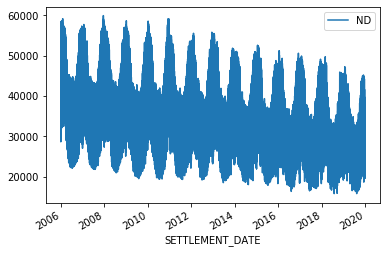

In [97]:
final_df.plot()

In [99]:
final_df.ND.resample('D')


In [103]:
#getting daily demand instead of half hourly(summing throughout the day)
final_df = final_df.groupby("SETTLEMENT_DATE").sum()

<Figure size 720x720 with 0 Axes>

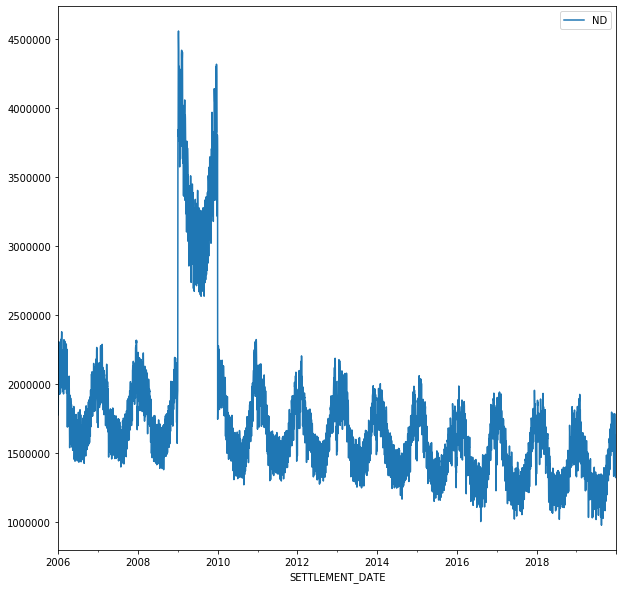

In [107]:
final_df.plot(figsize = (10,10))

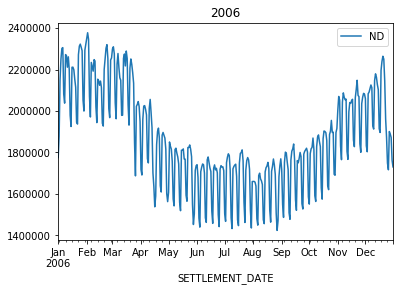

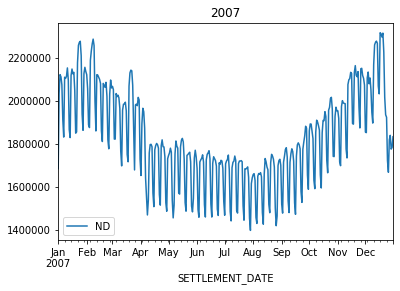

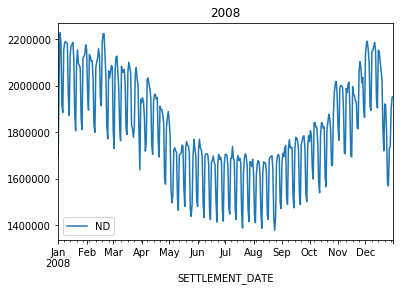

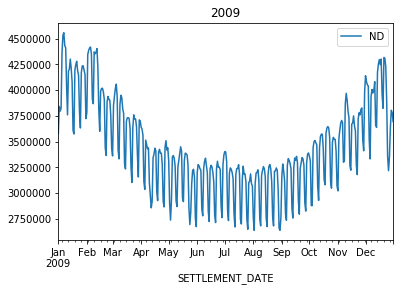

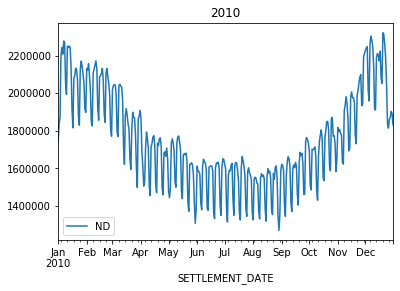

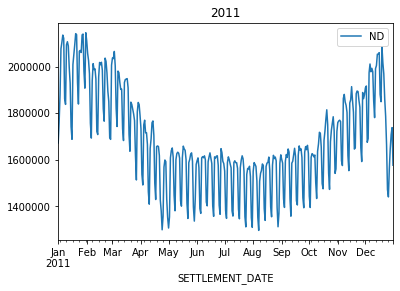

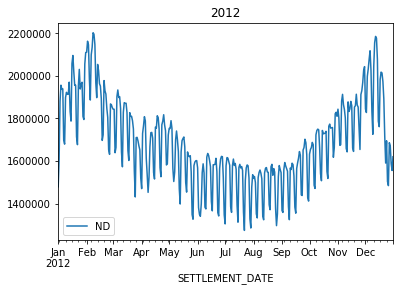

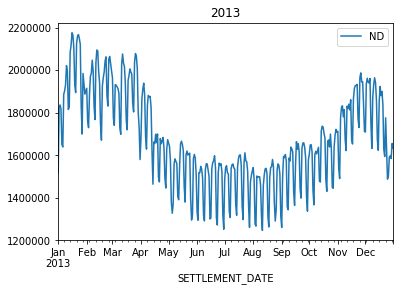

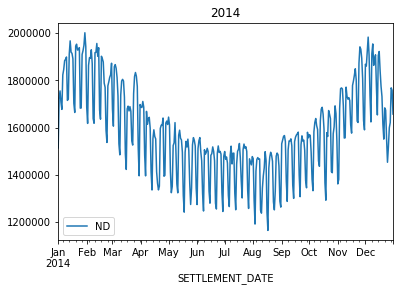

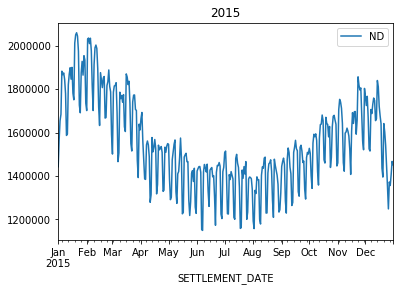

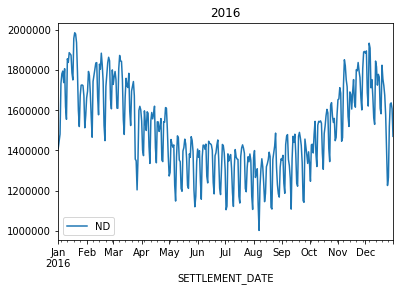

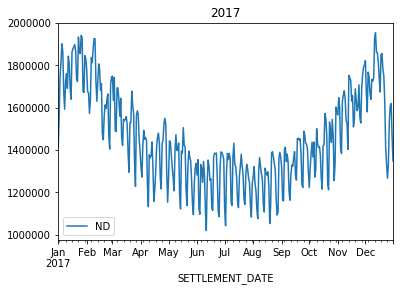

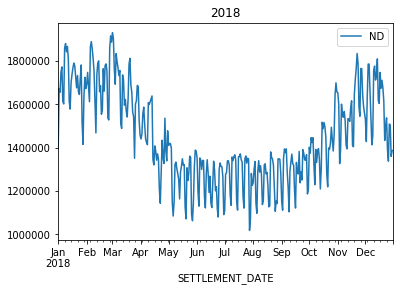

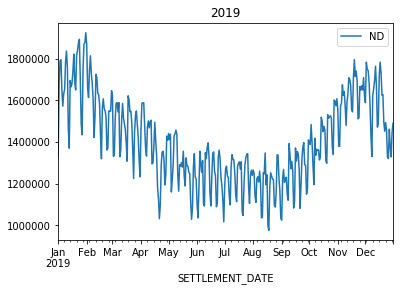

In [117]:
for year in range(2006,2020):
    final_df[final_df.index.year == year].plot()
    plt.title(year)

### Something happened 2009, I am not sure what exactly.